/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


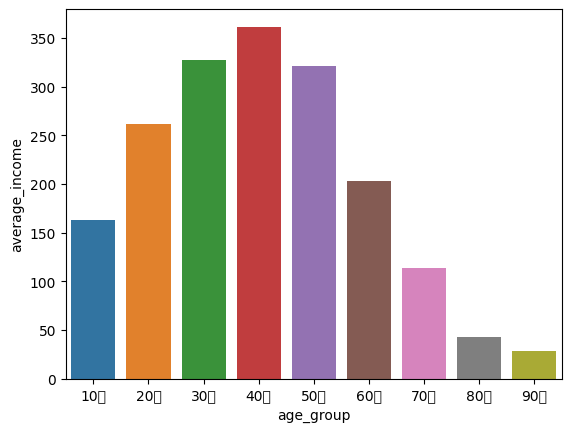

In [1]:
# 작성자: 송우석
# 3. 어떤 연령대의 월급이 가장 많을까?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#한글 폰트 지정
# plt.rcParams['font.family'] = 'D2Coding'

raw_welfare = pd.read_spss('../Koweps_hpwc14_2019_beta2.sav')
welfare = raw_welfare.copy()
welfare = welfare.rename(columns = {'h14_g3':'sex',
                                    'h14_g4':'birth',
                                    'h14_g10':'marriage_type',
                                    'h14_g11':'religion',
                                    'p1402_8aq1':'income',
                                    'h14_eco9':'code_job',
                                    'h14_reg7':'code_region'})

# birth열로 나이 계산해 age열 생성
welfare['age'] = 2019-welfare['birth']
age_income = welfare.dropna(subset = ['income'])\
    .groupby('age', as_index = False)\
        .agg(average_income = ('income', 'mean'))

# 10대~90대 구간의 경계값 설정
bins = [9, 19, 29, 39, 49, 59, 69, 79, 89, 99]
labels = ['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대']

# 경계값을 기준으로 나누고, 라벨을 붙여서 age_income 데이터프레임에 age_group열을 만듦
age_income['age_group'] = pd.cut(age_income['age'], bins=9, labels=labels)
age_group_income = age_income\
    .groupby('age_group', as_index = False)\
        .agg(average_income = ('average_income', 'mean'))

# 40대의 월급이 가장 많다.
sns.barplot(data = age_group_income, x = 'age_group', y = 'average_income')
plt.show()